## Introduction

In this project, we work with the information of home transactions around the city of Beijing. This project consists of 5 main parts :
<ol>
    <li>In the first part, we read the data and delete unnecessary columns and fill empty values.</li>
    <li>In the second part, the columns are converted to the appropriate format and the outlier data is deleted.</li>
    <li>In the third part, we create new features using existing features.</li>
    <li>In the fourth part, using the latitude and longitude of the houses, we show it on the map to get an overview of that area.</li>
    <li>In the last step, we analyze the time of transactions. </li>
</ol>


## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians
%matplotlib inline

## Loading the Data

In [2]:
housing = pd.read_csv('housing_data.csv', encoding='gbk')
housing.head()

c:\users\niloo\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (2,10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,url,id,Lng,Lat,Cid,tradeTime,DOM,totalPrice,square,...,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,415.0,131.00,...,1,1,高 26,2005,3,6,0.217,1.0,1.0,7
1,1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,575.0,132.38,...,1,2,高 22,2004,4,6,0.667,1.0,0.0,7
2,2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,1030.0,198.00,...,1,3,中 4,2005,3,6,0.500,1.0,0.0,7
3,3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,297.5,134.00,...,1,1,底 21,2008,1,6,0.273,1.0,0.0,6
4,4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,392.0,81.00,...,1,1,中 6,1960,2,2,0.333,0.0,1.0,1


The data explanations are as follow:
<ul>
    <li>Unnamed: 0: The index of data that we do not need and should be deleted </li>
<li>url : Transaction's link </li>
<li>id : Transaction's ID </li>
<li>Lng : Longitude of the traded house </li>
<li>Lat : Latitude of the traded house </li>
<li>Cid : Buyer ID </li>
<li>tradeTime : Transaction time </li>
<li>DOM : The number of days that have passed since the announcement of the house </li>
<li>totalPrice : The price at which the house is sold </li>
<li>square : House area </li>
<li>livingRoom : Number of living rooms </li>
<li>drawingRoom : Number of drawingRoom </li>
<li>kitchen : Number of kitchens </li>
<li>bathRoom : Number of bathrooms </li>
<li>floor : Floor and height of the house </li>
<li>constructionTime : Year of house construction </li>
<li>RenovationCondition : House Renovation Status </li>
<li>buildingStructure : House structure </li>
<li>ladderRatio : The ratio of person to elevator in each floor </li>
<li>elevator : Does the house have an elevator or not? </li>
<li>subway : Does the house have access to the subway or not? </li>
<li>district : The area where the house is located </li>
</ul>

In [3]:
housing.shape

(318851, 22)

## Preprocessing the Data

In [4]:
#removing url، id، Cid columns
housing.drop(columns=["Unnamed: 0", "Cid", "id", "url"], inplace = True)

In [5]:
housing_null = housing.isna().sum().reset_index()
housing_null.columns=["Column", "number of null values"]
housing_null

,Column,number of null values
0,Lng,0
1,Lat,0
2,tradeTime,0
3,DOM,157977
4,totalPrice,0
5,square,0
6,livingRoom,0
7,drawingRoom,0
8,kitchen,0
9,bathRoom,0


The DOM column, which indicates the number of days the ad was on the site, has a lot of missing values, and if we try to delete the columns whose DOM value is not available, almost half of our data will be deleted. On the other hand, this feature has important informations, and removing the DOM column is not reasonible. So it is better to fill in missing values with average or mode. 

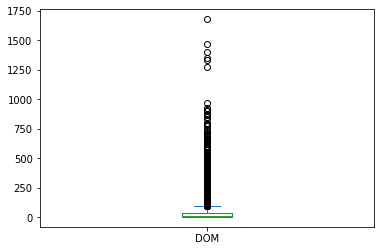

In [6]:
housing.DOM.plot(kind = 'box');

As we can see in the above plot, this column has a lot of outliers. Therefore, using mode is a better option. 

In [7]:
housing.DOM.fillna(housing.DOM.mode()[0], inplace=True)

In [8]:
#remove rows without values for elevator or subway
housing.dropna(subset=['elevator', 'subway'], inplace=True)

## Data Formats

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318819 entries, 0 to 318850
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  318819 non-null  float64
 1   Lat                  318819 non-null  float64
 2   tradeTime            318819 non-null  object 
 3   DOM                  318819 non-null  float64
 4   totalPrice           318819 non-null  float64
 5   square               318819 non-null  float64
 6   livingRoom           318819 non-null  object 
 7   drawingRoom          318819 non-null  object 
 8   kitchen              318819 non-null  int64  
 9   bathRoom             318819 non-null  object 
 10  floor                318819 non-null  object 
 11  constructionTime     318819 non-null  object 
 12  renovationCondition  318819 non-null  int64  
 13  buildingStructure    318819 non-null  int64  
 14  ladderRatio          318819 non-null  float64
 15  elevator         

#### Suitable format for categorical data: 
A number of columns are categorized data. Columns such as elevators, building materials, reconstruction conditions, etc. It's better to convert these numbers to their string equivalents for visualization purpuses.

In [10]:
housing_categorical = housing.copy()

housing_categorical.elevator = housing_categorical.elevator.map({1:"has elevator", 0:"no elevator"})
housing_categorical.subway = housing_categorical.subway.map({1:"has subway", 0:"no subway"})
housing_categorical.buildingStructure = housing_categorical.buildingStructure.map({1:"unknown", \
            2:"mixed", 3:"brick and wood",4:"concrete", 5:"steel", 6:"steel-concrete composite"})
housing_categorical.renovationCondition = housing_categorical.renovationCondition.map({1:"other",\
            2:"rough", 3:"Simplicity", 4:"hardcover"})

housing_categorical.head()

,Lng,Lat,tradeTime,DOM,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district
0,116.475489,40.019520,2016-08-09,1464.0,415.0,131.00,2,1,1,1,高 26,2005,Simplicity,steel-concrete composite,0.217,has elevator,has subway,7
1,116.453917,39.881534,2016-07-28,903.0,575.0,132.38,2,2,1,2,高 22,2004,hardcover,steel-concrete composite,0.667,has elevator,no subway,7
2,116.561978,39.877145,2016-12-11,1271.0,1030.0,198.00,3,2,1,3,中 4,2005,Simplicity,steel-concrete composite,0.500,has elevator,no subway,7
3,116.438010,40.076114,2016-09-30,965.0,297.5,134.00,3,1,1,1,底 21,2008,other,steel-concrete composite,0.273,has elevator,no subway,6
4,116.428392,39.886229,2016-08-28,927.0,392.0,81.00,2,1,1,1,中 6,1960,rough,mixed,0.333,no elevator,has subway,1


#### Suitable format for numerical data:

Columns that have a string value are of type Object. If we look more closely, we see that some numerical columns (such as the year the house was built and the height of the house) are also made of object. We convert these columns to numeric values.
First, we examine the unique values of these columns: 

In [11]:
print('constructionTime : ',housing_categorical.constructionTime.unique())

constructionTime :  ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']


In [12]:
print('floor : ',housing_categorical.floor.unique())

floor :  ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低 12' '中 10' '中 16' '顶 20' '底 19' '中 31' '低 13'
 '底 10' '高 25' '中 21' '中 20' '高 20' '低 21' '低 24' '顶 4' '高 21' '高 7'
 '中 22' '底 1' '中 7' '底 8' '顶 15' '中 18' '高 28' '顶 14' '顶 13' '低 20' '底 26'
 '低 17' '顶 24' '底 23' '顶 3' '顶 21' '底 24' '高 30' '高 11' '底 25' '高 27'
 '底 9' '低 11' '低 28' '低 15' '顶 26' '低 34' '顶 12' '中 25' '高 8' '底 17'
 '高 32' '高 19' '底 7' '顶 28' '顶 9' '高 31' '中 26' '顶 2' '顶 8' '底 32' '中 42'
 '底 30' '低 32' '底 16' '低 3' '底 22' '高 14' '高 23' '底 27' '底 13' '低 27'
 '顶 23' '低 29' '顶 22' '高 29' '中 34' '顶 25' '高 34' '顶 10' 

By looking at the unique values of the constructionTime column, we see that for some houses there is a Chinese phrase that means (unknown). There are just a few of them so we can remove them. 

In [13]:
housing_construction = housing_categorical.copy()

housing_construction = housing_construction[ housing_construction.constructionTime != '未知' ]
housing_construction.constructionTime = housing_construction.constructionTime.astype('int')

In the floor column, we see there is a Chinese word followed by a number. The number after the Chinese character indicates the height of the house (the words are equivalent to upper, lower and middle). This column can be converted into two different columns, but here we discard the Chinese expressions and keep only the numbers. 

In [14]:
housing_floor = housing_construction.copy()

housing_floor.floor = housing_floor.floor.str.split().str.get(1)
housing_floor.floor = housing_floor.floor.astype('int')

In [15]:
housing_floor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299536 entries, 0 to 318849
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  299536 non-null  float64
 1   Lat                  299536 non-null  float64
 2   tradeTime            299536 non-null  object 
 3   DOM                  299536 non-null  float64
 4   totalPrice           299536 non-null  float64
 5   square               299536 non-null  float64
 6   livingRoom           299536 non-null  object 
 7   drawingRoom          299536 non-null  object 
 8   kitchen              299536 non-null  int64  
 9   bathRoom             299536 non-null  object 
 10  floor                299536 non-null  int32  
 11  constructionTime     299536 non-null  int32  
 12  renovationCondition  299536 non-null  object 
 13  buildingStructure    299536 non-null  object 
 14  ladderRatio          299536 non-null  float64
 15  elevator         

In [16]:
housing_floor.livingRoom = housing_floor.livingRoom.astype('int64')
housing_floor.drawingRoom = housing_floor.drawingRoom.astype('int64');
housing_floor.bathRoom = housing_floor.bathRoom.astype('int64');

In [17]:
housing_floor['tradeTime'] = pd.to_datetime(housing_floor['tradeTime'])

## Outliers

There may be homes which are very large and very expensive, or conversely, homes that are too cheap or too small which are far from average. In this section, we will remove some houses that have one or more outlier or unusual features. 

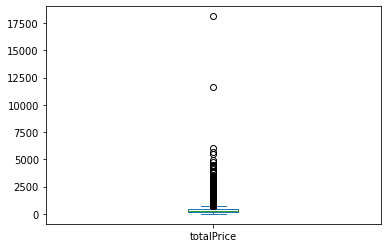

In [18]:
housing_floor.totalPrice.plot(kind = 'box');

Some data is so skewed that a box chart is out of box mode. The points at the top of the graph are outlier. We eliminate homes whose total price does not fall within one and a half times the interquater range distance from each side of the box (q1, q3).

In [19]:
q3 = housing_floor.totalPrice.quantile(0.75)
q1 = housing_floor.totalPrice.quantile(0.25)
iqr = (q3 - q1) * 1.5

housing_no_outlier = housing_floor[ (housing_floor.totalPrice > q1-iqr) & \
                                   (housing_floor.totalPrice < q3+iqr) ]

Now our plot is more normal.

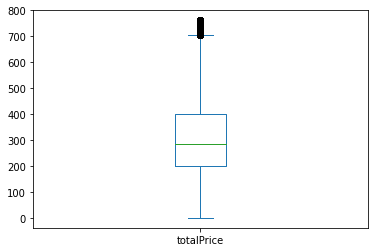

In [20]:
housing_no_outlier.totalPrice.plot(kind = 'box');

## Add new features 

We can calculate the distance of each house to the center of the Chinese capital and add it to the data frame. The center of the Chinese capital is 116.4074 and 39.9042, respectively. 

<p style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
φ is latitude
<br>
λ is longitude
<br>
Distance = acos(sinφ1*sinφ2 + cosφ1*cosφ2 * cos(λ2-λ1)) * 6371.0088
</font>
</p>


In [21]:
capital_Lng = radians(116.4074)
capital_Lat = radians(39.9042)
                      
housing_capital = housing_no_outlier.copy()

housing_capital['Lat'] = housing_capital.apply(lambda row: radians(row['Lat']), axis=1)
housing_capital['Lng'] = housing_capital.apply(lambda row: radians(row['Lng']), axis=1)

housing_capital['distanceToCapital'] = housing_capital.apply( lambda row:\
                    np.arccos( np.sin(capital_Lat) * np.sin(row['Lat']) + \
                    np.cos(capital_Lat) * np.cos(row['Lat']) *\
                    np.cos(row['Lng']-capital_Lng)) * 6371.0088, axis=1)

We have the traded price and the area of each house so we can calculate the price per square meter of each house.

In [22]:
housing_capital['pricePerSquare'] = 1000 * housing_capital['totalPrice']/housing_capital['square'] 

## Plots

<ipython-input-23-066f6a6401c1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  housing_capital.hist(ax = ax, bins = 20);


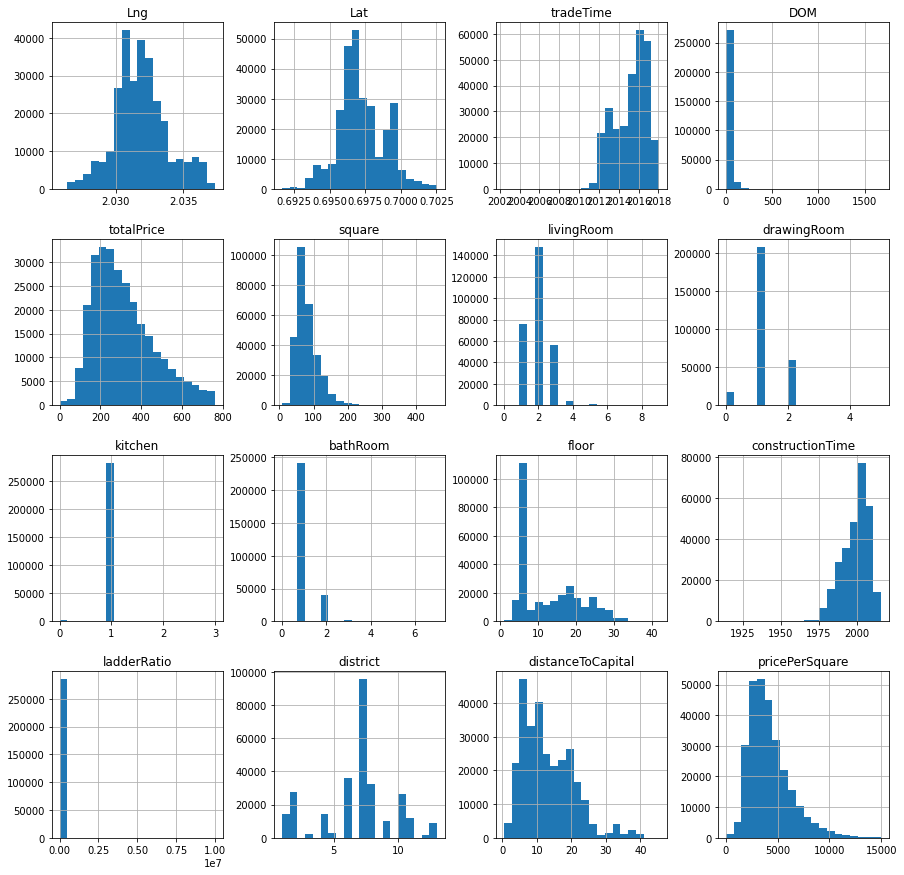

In [23]:
fig , ax = plt.subplots()
fig.set_size_inches(15,15)
housing_capital.hist(ax = ax, bins = 20);

According to the chart above, the house price has a curve towards the price of 200 million yuan. Most houses were built around 2000. The maximum distance from the center of the capital is 40 km. Most houses have two livingRoom,...

#### Bar charts:
In the below charts we can see how each categorical feature have impact on price per Square. For example houses with brick and wood structures are more expensive than others.

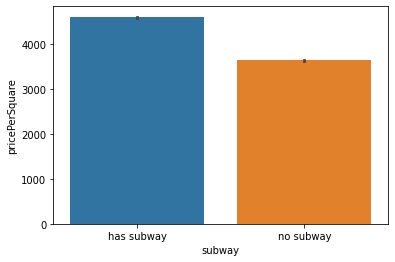

In [24]:
sns.barplot(data = housing_capital, x='subway', y='pricePerSquare' );

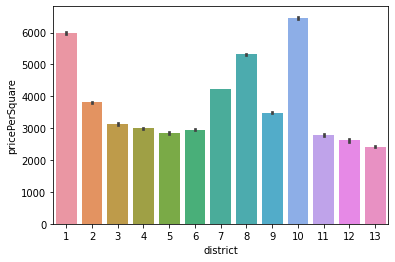

In [25]:
sns.barplot(data = housing_capital, x='district', y='pricePerSquare' );

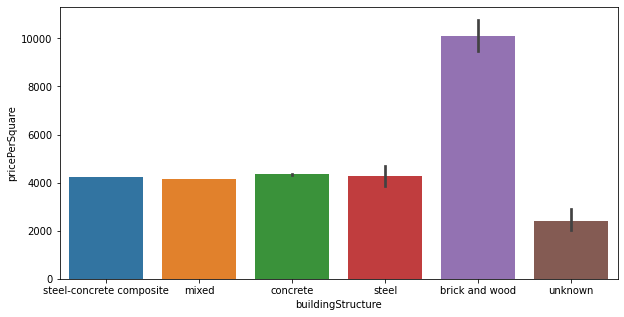

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data = housing_capital, x='buildingStructure', y='pricePerSquare');

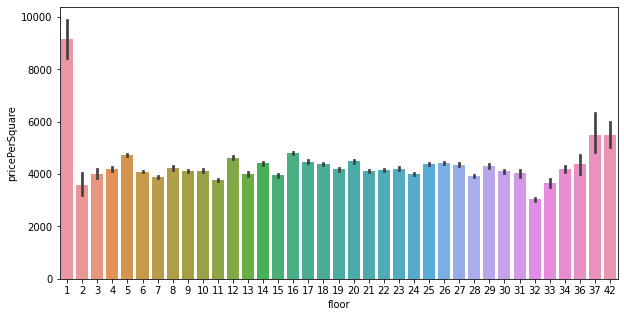

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data = housing_capital, x='floor', y='pricePerSquare' );

#### Effect of distance from the center on the price per square meter: 
We want to use the new column we built and see how the price per square meter of the house changes as we move away from the city center. To do this, we can use seaborn's regplot, which in addition to showing the points, shows the data trend with regression. 

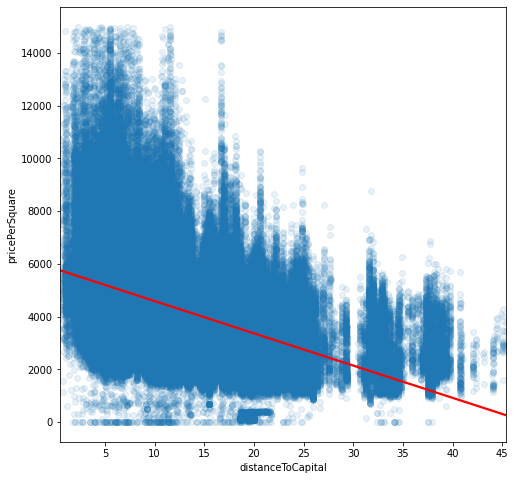

In [28]:
fig , ax = plt.subplots()
fig.set_size_inches(8,8)

sns.regplot(ax = ax, data = housing_capital, x = 'distanceToCapital', y = 'pricePerSquare', 
                   line_kws={'color':'red'}, scatter_kws= {'alpha': 0.1});

#### impact of elevators on the price per square meter: 

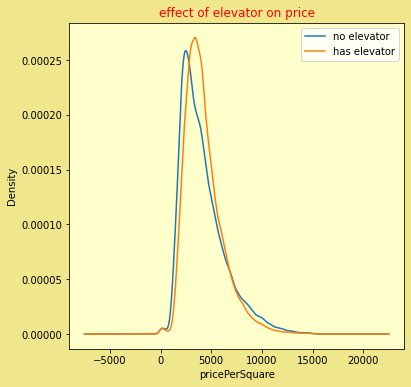

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
housing_capital[housing_capital.elevator == "no elevator"].pricePerSquare.plot(kind='kde', ax = ax, label="no elevator")
housing_capital[housing_capital.elevator == "has elevator"].pricePerSquare.plot(kind='kde', ax = ax, label="has elevator" )
plt.title("effect of elevator on price", color="red")
ax.set_xlabel("pricePerSquare")
ax.set_ylabel("Density")
ax.set_facecolor("#ffffcc")
fig.set_facecolor("khaki")
ax.legend();

## Showing on map 

In this section, we use one hundredth of our data to plot. With the latitude and longitude of the houses, we can draw the houses on the screen and see their position relative to each other with scatter plot. Most of the houses are gathered in one place, which is the center of the Chinese capital. 

In [30]:
housing_sample = housing_capital.iloc[:-100:100]
housing_sample.shape

(2850, 20)

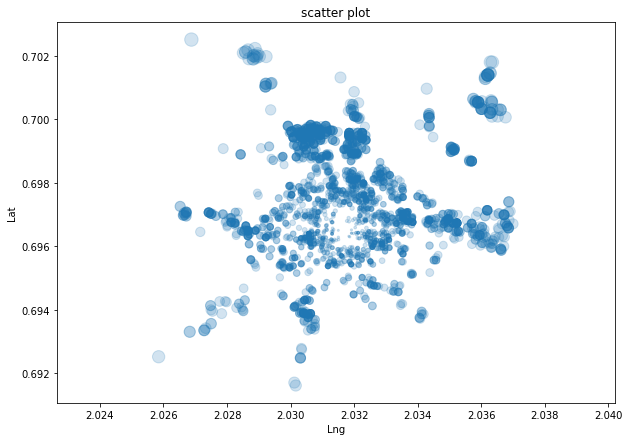

In [31]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' ,y ='Lat' ,ax = ax1, kind = 'scatter', alpha = 0.2,   s=housing_sample['distanceToCapital']*4)
ax1.axis('equal')
ax1.set_title('scatter plot');

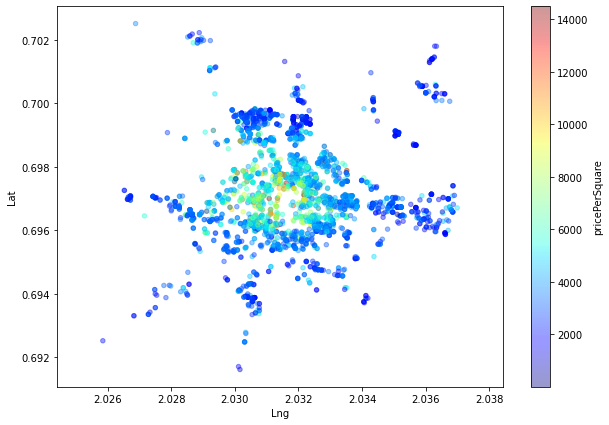

In [32]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(10,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax2, kind = 'scatter',alpha = 0.4,
                c = 'pricePerSquare', cmap=plt.get_cmap("jet"),colorbar=True,)

ax2.axis('equal');

The chart above shows how the most expensive houses (per square meter) are located near the city center and how prices decrease as we move away from the city center. 

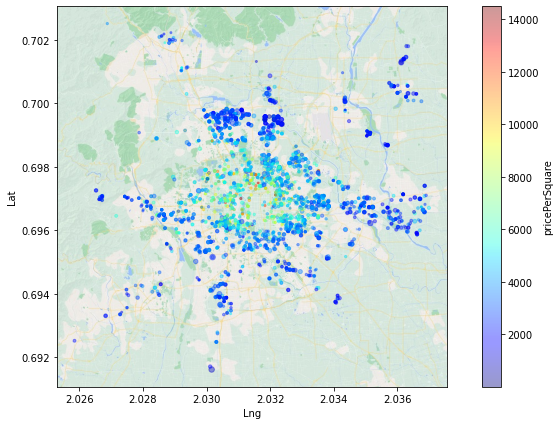

In [33]:
import matplotlib.image as mpimg

beijing_img = mpimg.imread('map1.jpg')
ax2.imshow(beijing_img, extent=[115.89777890444654, 116.90711309555346, 39.5957436, 40.2840444])
fig2

fig4, ax4 = plt.subplots()

fig4.set_size_inches(12.5,7)

housing_sample.plot(x = 'Lng' , y ='Lat' ,ax = ax4, kind = 'scatter', alpha = 0.4,\
                    c = 'pricePerSquare', cmap=plt.get_cmap("jet"),colorbar=True,\
                    s=housing_sample['square']/10)

ax4.imshow(beijing_img, extent=[2.02529006213284, 2.037554583289055, 0.6910779438991503, 0.7030503964223485]);


## Time analysis 

For each region we calculate the following: 
<ul>
    <li>pricePerSquare mean : Average price per square meter </li>
    <li>% houses with elevator : Percentage of homes with elevators </li>
    <li>% houses with subway : Percentage of homes that have access to the subway </li>
    <li>square mean : Average area of houses </li>
    <li>building age mean : Average house's age (in years)
    (The age of each house is calculated until 2022.) </li>
    <li>frequent buildingStructure : The most common type of building  </li>
</ul>

In [34]:
districts = housing_capital.district.unique()
districts_df = pd.DataFrame(data=np.sort(districts), columns=['district'])

In [35]:
districts_df['pricePerSquare mean'] = housing_capital.groupby(by='district')['pricePerSquare'].mean().values
districts_df['% houses with elevator'] = housing_capital.groupby(by='district')['elevator']\
            .apply(lambda x: (x[x == 'has elevator'].count()/x.count()) * 100).values
districts_df['% houses with subway'] = housing_capital.groupby(by='district')['subway']\
            .apply(lambda x: (x[x == 'has subway'].count()/x.count()) * 100).values
districts_df['square mean'] = housing_capital.groupby(by='district')['square'].mean().values
districts_df['buildeng age mean'] = 2022 - housing_capital.groupby(by='district')['constructionTime'].mean().values
districts_df['frequent buildingStructure'] = housing_capital.groupby(by='district')['buildingStructure']\
            .agg(lambda x : x.value_counts().idxmax()).values
districts_df.set_index('district', inplace=True)
districts_df

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,buildeng age mean,frequent buildingStructure
district,,,,,,
1,5981.774965,56.216550,93.488404,67.047856,26.151709,steel-concrete composite
2,3805.924811,68.647623,61.825544,76.951352,21.639123,steel-concrete composite
3,3130.333142,66.636691,47.032374,92.071484,16.494604,steel-concrete composite
4,2999.928821,39.983398,43.027117,86.322272,19.324364,mixed
5,2841.761483,80.077031,39.005602,89.297990,12.271359,steel-concrete composite
6,2952.222451,37.892663,43.553669,100.121614,18.536464,mixed
7,4225.965657,66.746216,68.307898,78.845544,23.553717,steel-concrete composite
8,5312.914827,51.883462,61.087404,73.615248,25.191570,steel-concrete composite
9,3491.126972,46.534461,27.636823,73.047513,26.653835,steel-concrete composite


#### The trend of changing the average price per square meter in monthly transactions after 2010: 

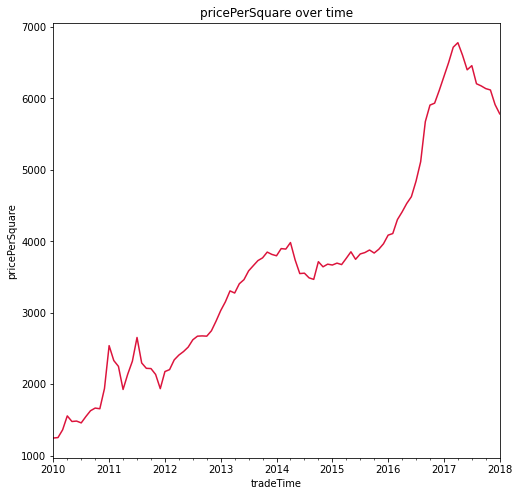

In [36]:
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(8,8)

housing_capital.loc[housing_capital.tradeTime >= '2010']\
        .resample(rule='M', on='tradeTime')['pricePerSquare']\
        .mean().plot(ax=ax1, color = 'crimson')

ax1.set_title('pricePerSquare over time')
ax1.set_ylabel('pricePerSquare');

#### The number of house's sold near the city center: 
(The number of houses that are less than 15 km away from the city center in 3-month intervals)

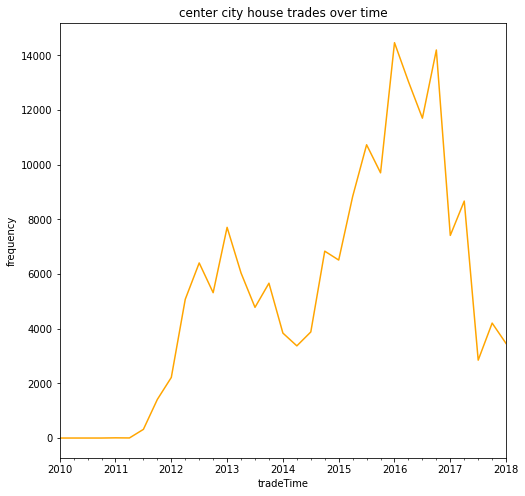

In [37]:
fig2 , ax2 = plt.subplots()
fig2.set_size_inches(8,8)

housing_capital.loc[housing_capital.tradeTime >= '2010']\
        .resample(rule='3M', on='tradeTime').distanceToCapital\
        .apply(lambda x: x[x < 15].count()).plot(ax=ax2, color='orange')

ax2.set_title('center city house trades over time')
ax2.set_ylabel('frequency');